# 04. Matrix Factorization 기반 추천

- 추천을 위한 알고리즘은 크게 메모리 기반 (memory-based)과 모델 기반 (model- based)로 구분
- **메모리 기반 알고리즘은 추천을 위한 데이터를 모두 메모리에 가지고 있으면서 추천이 필요할 때마다, 이 데이터를 사용해서 계산하는 방식으로 추천 (CF)**
    - 메모리 기반 추천은 모든 데이터를 메로리에 저장하고 있기 때문에 원래 데이터를 충실하게 사용하는 장점이 있지만,    
        
        대량의 데이터를 다뤄야 하는 상용 사이트에서는 계산시간이 너무 오래 걸린다는 단점이 존재
    


<br>

- **모델 기반 추천은 데이터로부터 추천을 위한 모델을 구성한 후에 이 모델만 저장하고, 실제 추천을 할 때에는 이 모델을 사용해서 추천 (행렬 요인화, MF)**
    - 모델 기반 추천 방식은 원래 데이터는 모형을 만드는 데만 사용하고, 일단 모델이 만들어지면 원래 데이터는 사용하지 않기 때문에 대규모 상용 사이트에서 필요한 빠른 반응이 가능하지만, 
        
        모델이 만들어지는 과정에서 많은 계싼이 필요

<br>

- **메모리 기반 추천은 개별 사용자의 데이터에 집중하는 데 비해, 모델 기반 추천은 전체 사용자의 평가 패턴으로부터 모델을 구성하기 때문에,**
    
    **데이터가 가지고 있는 약한 신호(weak signal)도 더 잘 잡아내는 장점이 존재**
    
    - **약한 신호 : 개별 사용자의 행동분석에는 잘 드러나지 않는 패턴**
    
        (소수의 사용자가 소수의 영화에 대해서만 특정한 평가 패턴이 있는 경우, 개별 사용자나 개별 아이템에 집중하는 메모리 기반 알고리즘은 이것을 잡아내기 쉽지 않지만, 
        
        전체 데이터를 대상으로 모델을 구성하는 모델 기반 추천은 더 잘 잡아냄)

<br>

## 04.01. Matrix Factorization(MF) 방식의 원리
- 행렬요인화 (Matrix Factorization :MF)는 평가 데이터, 즉 (사용자 X 아이템)으로 구성된 하나의 행렬을 2개의 행렬로 분해

<img src='https://blog.kakaocdn.net/dn/c56IN5/btrqMR4mzQk/eTTwJLK93xJeYGFndTbRY1/img.png' width='800px'>

- **$R$ : (사용자 X 아이템) 평가 데이터이며, M명의 사용자가 N개의 아이템에 대해 평가한 데이터를 포함하고 있는 2차원 행렬**
    - **행렬의 각 원소 (element)는 해당 사용자의 해당 아이템에 대한 평가정보**
    - 이 행렬은 사용자가 실제로 평가한 아이템에 대한 평점만을 가지고 있기에, 결측값의 빈도가 높음

<br>

- **$R$행렬을 사용자행렬 $P$와 아이템행렬 $Q$로 쪼개어 분석하는 것이 MF방식**
- **$P$는 $M\times K$의 차원을 가지고, $Q$는 $N\times K$개의 차원을 가짐**
    
    $\rightarrow$ $P \times Q^T$인 $\hat{R}$은 $M\times N$의 차원을 가지게 되어, $R$과 같은 크기의 행렬이 됨
    
    $\rightarrow$ **$\hat{R}$은 $R$의 예측치이며, $\hat{R}$이 최대한 R에 가까운 값을 가지도록 하는 $P$와 $Q$를 구하는 모델을 생성**

<br>

- **$P$는 각 사용자의 특성을 나타내는 $K$개 요인의 값으로 이루어진 행렬,**

    **$Q$는 각 아이템의 특성을 나타내는 $K$개의 요인의 값으로 이루어진 행렬**
- **$P$와 $Q$행렬에서 공통인 $K$개의 요인이 존재하며, 이는 잠재요인 (latent factor)**

    $\rightarrow$ **즉, MF는 사용자와 아이템의 특성을 $K$개의 잠재요인을 사용해서 분석하는 모델**

<br>

#### $K=2$ (잠재요인이 2개)인 예시
- $K=2$이므로, 사용자와 영화의 특성을 두 개 요인으로 나타낼 수 있음
- 만일 두 요인의 차원이 (액션-드라마), (판타지-사실주의)이며, 
    
   모든 사용자와 영화의 특성은 각 요인에 대해서 -1.0 ~ 1.0의 값으로 표현할 수 있다고 가정할 때,
   
   4가지 사용자에 대한 두 가지 잠재요인의 값 $P$행렬
   
   - 첫 번째 요인 (액션-드라마)에서 -1에 가까울수록 액션의 성격이 강하고, 1에 가까울수록 드라마의 성격이 강함
   - 두 번째 요인 (판타지-사실주의)에서 -1에 가까울수록 판타지 성격이 강하고, 1에 가까울수록 사실주의 성격이 강함
   
| 사용자 | 액션- 드라마  | 판타지-사실주의 |
| - | - | - |
| a | -0.43 | 0.21 |
| b | 0.31 | 0.92|
| c | 0.69 | -0.03 |
| d | 0.46 | -0.30 |

- a는 잠재요인 1이 -0.43으로서 액션영화를 좋아하지만, 잠재요인 2는 0.21로서 판타지보다는 사실적인 영화를 좋아함

<br>

- 영화별 잠재요인에 대한 $Q$행렬
    
    - ㄱ는 드라마의 성격이 강하고, 사실주의 성향이 강함

| 영화 | 액션- 드라마  | 판타지-사실주의 |
| - | - | - |
| ㄱ | 0.31 | 0.60 |
| ㄴ | 0.61 | -0.82|
| ㄷ | -0.38 | -0.61 |
| ㄹ | -0.79 | 0.08 |

<br>

- 2가지 요인의 값에 따라 2차원 공간에 배치해보면, 어떤 사용자가 어떤 영화를 좋아할지를 알 수 있음
    - r는 a의 취향에 잘 맞을 것이고, d는 4개의 영화 중에는 ㄴ를 가장 선호할 것이라 추측
    
    $\rightarrow$ **즉, 영화의 특성과 사용자의 특성이 각각 2개의 잠재요인으로 분해되었고, 이 잠재요인을 보면 어떤 영화가 어떤 사요자 취향에 맞을지 예상 가능**
    
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FARQPW%2FbtrqLwNKIji%2FpWOkaxzZ7dLIDSyYx4Z780%2Fimg.png' width='500px'>

- MF의 원리를 사용하면,ㄱ ㅏㄱ 사용자의 각 영화에 대한 예상 평점 $\hat{R}$도 알 수 있음

    $\rightarrow$ $\hat{R}=P \times Q^T$이므로, $P$와 $Q$를 사용해서 $\hat{R}$를 계산가능
    
| 사용자\\영화 | ㄱ  | ㄴ | ㄷ| ㄹ |
| - | - | - | - | - |  
| a | -0.0073 | -0.4345 | 0.0353 | 0.3565 |
| b | 0.6481 | -0.5653 | -0.6790 | -0.1713 |
| c | 0.1959 | 0.4455 | -0.2439 | -0.5475 |
| d | -0.0374 | 0.5266 | 0.0082 | -0.3874 |

<br>

## 04.02. SGD (Stochastic Gradient Descent)를 사용한 MF
- 어떤 도메인에 대해서 사용자와 아이템의 특성을 잘 설명할 수 있는 $K$개의 요인이 존재하고,
    
    각 사용자와 아이템의 $K$개의 요인에 대한 측정값을 알 수 있다면,  모든 사용자의 모든 아이템에 대한 예측 평점을 계산할 수 있음
    
- 만일 사용자가 어떤 영화에 대해서 실제 평점을 부여하였다면, 그 실제 평점과 예상 평점의 차이로 정확도를 계산

- **MF의 핵심은 주어진 사용자, 아이템의 관계를 가장 잘 설명하는 $P$, $Q$행렬을 분해하는 것**
    - 주어진 (사용자 X 아이템)의 평점행렬인 $R$로부터 $P$와 $Q$를 분해하는 알고리즘의 순서
    
    1. **잠재요인의 개수인 $K$를 설정, $K$는 경험에 의해 직관적으로 정해도 되고, 다양한 $K$를 비교하면서 최적의 수를 정함**
    2. **주어진 $K$에 따라 $P(M\times K)$와 $Q(N\times K)$행렬을 만들고 초기화**  (**맨 처음에는 $P$, $Q$행렬을 임의의 수로 채우는 것이 보통**)
        
    3. **주어진 $P$, $Q$행렬을 사용해서 예측 평점 $\hat{R}(=P \times Q^T)$를 계산**
    4. **$R$에 있는 실제 평점에 대해서 예측 평점 $\hat{R}$의 예측과 비교해서 오차를 구하고, 이 오차를 줄이기 위해서 $P$, $Q$값을 수정**
    5. **전체 오차가 미리 정해진 기준값 이하가 되거나, 미리 정해진 반복 횟수에 도달할 때 까지 반복**
    
    <br>
    
    - **핵심은 4에서 예측 오차를 줄이기 위해서 $P$ ,$Q$를 수정하는 방식이며, 가장 일반적으로 사용하는 방법은 SGD**

<br>



<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fx5OBI%2FbtrqMFbY5eA%2FAN0gpSqLPpqGW1hwKiCMMk%2Fimg.png' width='500px'>

- 예측값 $\hat{R}$은 $P \times Q^T$이므로, 사용자 $i$의 아이템 $j$에 대한 예측값 $\hat{r}_{i,j}$는 

    $$\hat{r}_{i,j} = p^T_i q_j = \sum^K_{k=1} p_{ik} q_{kj}$$
    
- 에측 오차 $\epsilon_{ij}$와 오차 제곱은

    $$\epsilon_{ij} = (r_{ij} - \hat{r}_{ij})$$
    
    $$\epsilon^2_{i,j} = (r_{ij} - \hat{r}_{ij})^2 = (r_{ij} - \sum^K_{k=1}p_{ik}q_{kj})^2$$

- SGD에 따라 오차제곱을 최소화하는 방향을 탐색하기 위해, 오차 제곱을 $p$와 $q$에 대해서 편미분

    $$\frac{\delta}{\delta p_{ik}}e_{ij} = -2 (r_{ij} -\hat{r}_{ij})(q_{kj})=-2 e_{ij} q_{kj}$$
    
    $$\frac{\delta}{\delta q_{ik}}e_{ij} = -2 (r_{ij} -\hat{r}_{ij})(p_{ik})=-2 e_{ij} p_{ik}$$
    
    따라서 오차를 줄여주는 새로운 $p_i$, $q_j$값인 $p^{'}_i$와 $q^{'}_j$를 구하기 위한 식
    
    $$p^{'}_i=p_{ik} - \alpha \frac{\delta}{\delta p^2_{ik}} = p_{ik} + 2\alpha e_{ij} q_{kj}$$
    
    $$q^{'}_i=q_{kj} - \alpha \frac{\delta}{\delta q^2_{kj}} = q_{kj} + 2\alpha e_{ij} p_{ik}$$
    
    - $\alpha$는 학습률 (learning rate)


- 연산을 반복할 때 마다 실제 평점이 존재하는 모든 $(p_i, q_j)$조합에 대해 예측값과 오차를 계산한 후에 위의 식에 따라$p_i$, $q_j$ 값을 갱신
    
    $\rightarrow$ 오차가 점차 감소하며 $P$와 $Q$행렬을 추정

<br>

### 과적합 (over-fitting)과 정규화 (regularization)
- **과적합을 방지하기 위하여 오차제곱에 정규화 항을 추가**

    $$\epsilon^2_{i,j} = (r_{ij} - \sum^K_{k=1}p_{ik}q_{kj})^2 + \frac{\beta}{2} \sum^K_{k=1}(||P||^2 + ||Q||^2)$$

- $p_i$, $q_j$에 대해서 편미분
    - $\beta$는 정규화 정도를 정하는 정규화 계수
    
    $$p^{'}_i=p_{ik} - \alpha \frac{\delta}{\delta p^2_{ik}} = p_{ik} + \alpha (2e_{ij} q_{kj} - \beta p_{ik})$$
    
    $$p^{'}_i=q_{kj} - \alpha \frac{\delta}{\delta q^2_{kj}} = q_{kj} + \alpha (2e_{ij} p_{ik} - \beta q_{kj})$$

- **각 사용자와 각 아이템의 편향 (경향성, bias)고려**
    - **CF알고리즘과 마찬가지로, 각 사용자와 각 아이템은 일정한 편향(평가가 높거나 낮은 경향)이 존재**
    
        $\rightarrow$ 편향을 제거하고 나머지 데이터만을 분석하는 것이 더 정확
        
    <br>
    
    - **$b$는 $R$의 전체 평균, 데이터가 주어지면 하나의 값으로 결정**
    - **$b u_i$는 전체 평균을 제거한 후, 사용자 $i$의 평가경향 (사용자 $i$의 평균과 전체 평균의 차이)**
    - **$bd_j$는 전체 평균을 제거한 후 아이템 $j$의 평가경향 (아이템 $j$의 평균과 전체 평균의 차이)**
    
    $$\hat{r}_{ij} = b + b u_i + bd_j + \sum^K_{k=1} p_{ik}q_{kj}$$

<br>

- **CF알고리즘에서는 사용자와 아이템별로 평가경향이 한 번에 계산되었지만, MF에서는 계산할 때마다 오차를 최소화하도록 평가 경향을 다시 조정**

    $\rightarrow$ 편향을 고려하며 편미분과정을 거친 새로운 $bu_i$와 $bd_j$
    
    $$bu^{'}_i = bu_i + \alpha (e_{ij}-\beta b u_i)$$
    
    $$bd^{'}_j = bd_j + \alpha (e_{ij}-\beta b d_j)$$


<br>

- **정규화와 편향을 고려하며 SGD를 사용한 계산을 여러번 반복**
    - **최초의 상태에서, $R$행렬에서 원소가 존재하는(사용자가 평가를 한) 모든 (사용자 $i$, 아이템 $j$) 조합에 대해서**
        
        **$P$ ,$Q$ 행렬과 $bu$, $bd$를 갱신하는 것이 한번의 계산**

<br>

## 04.03. SGD를 사용한 MF 기본 알고리즘

In [5]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [6]:
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('u.data', names=r_cols,  sep='\t',encoding='latin-1')
ratings = ratings[['user_id', 'movie_id', 'rating']].astype(int)   

<br>

- `K` : 잠재요인의 수
- `alpha` : 학습률 $\alpha$
- `beta` : 정규화 계수 $\beta$
- `iterations` : SGD 계산 반복 수

In [17]:
class MF():
    
    def __init__(self, ratings, K, alpha, beta, iterations, verbose=True):
        self.R = np.array(ratings)
        self.num_users, self.num_items = np.shape(self.R)
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations
        self.verbose = verbose
        
    # RMSE 계산 함수
    def rmse(self):
        
        xs, ys = self.R.nonzero()
        self.predictions = []
        self.errors = []
        
        for x, y in zip(xs, ys):
            prediction = self.get_prediction(x, y)
            self.predictions.append(prediction)
            self.errors.append(self.R[x, y] - prediction)
            
        self.predictions = np.array(self.predictions)
        self.errors = np.array(self.errors)
        
        return np.sqrt(np.mean(self.errors**2))
    
    # 데이터 학습
    def train(self): 
        # P행렬과 Q행렬의 초기값을, 평균이 0이고 표준편차가 1/K인 정규분포 난수로 생성
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))

        # 사용자 평가 편향 bu와, 아이템 평가 편향 bd의 초기값을 0으로 생성
        self.b_u = np.zeros(self.num_users)
        self.b_d = np.zeros(self.num_items)
        # 전체평균 b 계산
        self.b = np.mean(self.R[self.R.nonzero()])

        # R의 원소중 결측값이 아닌 원소와 그 인덱스를 리스트로 생성 -> SGD를 적용할 대상
        rows, columns = self.R.nonzero()
        self.samples = [(i, j, self.R[i,j]) for i, j in zip(rows, columns)]
        
        # 시행
        training_process = [] # 각 시행별 RMSE 저장 
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            rmse = self.rmse()
            training_process.append((i+1, rmse))
            if self.verbose:
                if (i+1) % 10 == 0:
                    print("Iteration: %d ; Train RMSE = %.4f " % (i+1, rmse))
                    
        return training_process
                    
    # 각 시행마다 갱신된 bu, bd, P, Q를 통하여, R예측
    def get_prediction(self, i, j):
        prediction = self.b + self.b_u[i] + self.b_d[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    # SGD 적용 함수
    def sgd(self):
        for i, j, r in self.samples:
            prediction = self.get_prediction(i, j)
            e = (r - prediction)

            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_d[j] += self.alpha * (e - self.beta * self.b_d[j])

            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])
            

- 전체 데이터 적용

In [18]:
R_temp = ratings.pivot(index='user_id', columns='movie_id', values='rating').fillna(0)

In [23]:
R_temp

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
mf = MF(R_temp, K=30, alpha=0.001, beta=0.02, iterations=100, verbose=True)
train_process = mf.train()

Iteration: 10 ; Train RMSE = 0.9585 
Iteration: 20 ; Train RMSE = 0.9374 
Iteration: 30 ; Train RMSE = 0.9281 
Iteration: 40 ; Train RMSE = 0.9226 
Iteration: 50 ; Train RMSE = 0.9185 
Iteration: 60 ; Train RMSE = 0.9147 
Iteration: 70 ; Train RMSE = 0.9104 
Iteration: 80 ; Train RMSE = 0.9046 
Iteration: 90 ; Train RMSE = 0.8964 
Iteration: 100 ; Train RMSE = 0.8852 


<br>

## 04.04 훈련/테스트 데이터 분리

In [21]:
from sklearn.utils import shuffle

In [22]:
TRAIN_SIZE = 0.75
ratings = shuffle(ratings, random_state=1)
cutoff = int(TRAIN_SIZE * len(ratings))
ratings_train = ratings.iloc[:cutoff]
ratings_test = ratings.iloc[cutoff:]

In [25]:
ratings_train.shape, ratings_test.shape

((75000, 3), (25000, 3))

In [26]:
class NEW_MF():
    
    def __init__(self, ratings, K, alpha, beta, iterations, verbose=True):
        self.R = np.array(ratings)
        
        # user_id, item_id를 R의 인덱스와 매핑
        item_id_index = []
        index_item_id = []
        for i, one_id in enumerate(ratings):
            item_id_index.append([one_id, i])
            index_item_id.append([i, one_id])
            
        self.item_id_index = dict(item_id_index)
        self.index_item_id = dict(index_item_id)
        
        user_id_index = []
        index_user_id = []
        for i, one_id in enumerate(ratings.T):
            user_id_index.append([one_id, i])
            index_user_id.append([i, one_id])
            
        self.user_id_index = dict(user_id_index)
        self.index_user_id = dict(index_user_id)
        
        self.num_users, self.num_items = np.shape(self.R)
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations
        self.verbose = verbose

    def rmse(self):
        xs, ys = self.R.nonzero()
        self.predictions = []
        self.errors = []
        for x, y in zip(xs, ys):
            prediction = self.get_prediction(x, y)
            self.predictions.append(prediction)
            self.errors.append(self.R[x, y] - prediction)
            
        self.predictions = np.array(self.predictions)
        self.errors = np.array(self.errors)
        
        return np.sqrt(np.mean(self.errors**2))

    def get_prediction(self, i, j):
        prediction = self.b + self.b_u[i] + self.b_d[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    def sgd(self):
        for i, j, r in self.samples:
            prediction = self.get_prediction(i, j)
            e = (r - prediction)

            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_d[j] += self.alpha * (e - self.beta * self.b_d[j])

            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])

    # 테스트 데이터 선정
    def set_test(self, ratings_test):
        test_set = []
        for i in range(len(ratings_test)):     
            x = self.user_id_index[ratings_test.iloc[i, 0]]
            y = self.item_id_index[ratings_test.iloc[i, 1]]
            z = ratings_test.iloc[i, 2]
            test_set.append([x, y, z])
            self.R[x, y] = 0 # 훈련 데이터만을 사용하여 훈련을 진행하기에, 테스트 데이터에 해당 하는 R의 원소들은 제거 
            
        self.test_set = test_set
        
        return test_set                         

    # 테스트 데이터 RMSE 계산
    def test_rmse(self):
        error = 0
        for one_set in self.test_set:
            predicted = self.get_prediction(one_set[0], one_set[1])
            error += pow(one_set[2] - predicted, 2)
            
        return np.sqrt(error/len(self.test_set))

    # 훈련을 진행 하면서 테스트 데이터의 정확도를 계산
    def test(self):
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))

        self.b_u = np.zeros(self.num_users)
        self.b_d = np.zeros(self.num_items)
        self.b = np.mean(self.R[self.R.nonzero()])

        rows, columns = self.R.nonzero()
        self.samples = [(i, j, self.R[i,j]) for i, j in zip(rows, columns)]

        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            rmse1 = self.rmse()
            rmse2 = self.test_rmse()
            training_process.append((i+1, rmse1, rmse2))
            
            if self.verbose:
                if (i+1) % 10 == 0:
                    print("Iteration: %d ; Train RMSE = %.4f ; Test RMSE = %.4f" % (i+1, rmse1, rmse2))
                    
        return training_process

    def get_one_prediction(self, user_id, item_id):
        return self.get_prediction(self.user_id_index[user_id], self.item_id_index[item_id])

    def full_prediction(self):
        return self.b + self.b_u[:,np.newaxis] + self.b_d[np.newaxis,:] + self.P.dot(self.Q.T)


- 훈련/테스트 데이터를 적용

In [27]:
R_temp = ratings.pivot(index='user_id', columns='movie_id', values='rating').fillna(0)

In [ ]:
mf = NEW_MF(R_temp, K=30, alpha=0.001, beta=0.02, iterations=100, verbose=True)
test_set = mf.set_test(ratings_test)
result = mf.test()

- $\hat{R}$

In [33]:
print(mf.full_prediction())

[[3.8481407  3.41301804 3.11753766 ... 3.33612259 3.49514425 3.44643964]
 [3.9132339  3.49335426 3.14594609 ... 3.43695812 3.55113494 3.53972662]
 [3.36057818 2.88199419 2.5693306  ... 2.81577634 2.93754147 2.93322341]
 ...
 [4.17355742 3.77803506 3.43328939 ... 3.70736355 3.84017079 3.82591872]
 [4.37121687 3.90902082 3.56549399 ... 3.83611    3.94313652 3.94382296]
 [3.79649597 3.36209539 3.01609241 ... 3.28803043 3.41394849 3.41406192]]


<br>

## 04.05. MF의 최적 파라미터


<br>

#### 최적의 $K$값 탐색
- 50 ~ 260의 범위에서의 탐색

In [42]:
from tqdm import tqdm, trange

In [44]:
results = []
index = []
for K in range(50, 261, 10):
    
    print('K =', K)
    R_temp = ratings.pivot(index='user_id', columns='movie_id', values='rating').fillna(0)
    mf = NEW_MF(R_temp, K=K, alpha=0.001, beta=0.02, iterations=100, verbose=False)
    
    test_set = mf.set_test(ratings_test)
    result = mf.test()
    index.append(K)
    results.append(result)

K = 50
K = 60
K = 70
K = 80
K = 90
K = 100
K = 110
K = 120
K = 130
K = 140
K = 150
K = 160
K = 170
K = 180
K = 190
K = 200
K = 210
K = 220
K = 230
K = 240
K = 250
K = 260


<br>

#### 최적의 반복횟수 (iteration) 탐색

In [46]:
summary = []
for i in tqdm(range(len(results))):
    
    RMSE = []
    for result in results[i]:
        RMSE.append(result[2])
        
    min = np.min(RMSE)
    j = RMSE.index(min)
    summary.append([index[i], j+1, RMSE[j]])

100%|██████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<?, ?it/s]


In [47]:
summary

[[50, 100, 0.94233764726906],
 [60, 100, 0.9430403144027483],
 [70, 100, 0.943521695335574],
 [80, 100, 0.9437372586198512],
 [90, 100, 0.9438034001428509],
 [100, 100, 0.9437054674594669],
 [110, 100, 0.9438279168356434],
 [120, 100, 0.9437603439993129],
 [130, 100, 0.9440474850055126],
 [140, 100, 0.9440045675351597],
 [150, 100, 0.9442191280129176],
 [160, 100, 0.9441649335133655],
 [170, 100, 0.9443158874483076],
 [180, 100, 0.9443137577924552],
 [190, 100, 0.9442941086782904],
 [200, 100, 0.9444329332017095],
 [210, 100, 0.9443483340489025],
 [220, 100, 0.944487549047772],
 [230, 100, 0.9444287589953927],
 [240, 100, 0.9445028066802735],
 [250, 100, 0.9444356498483899],
 [260, 100, 0.944577514561525]]

<br>

#### 하이퍼파라미터 탐색 결과

In [48]:
import matplotlib.pyplot as plt

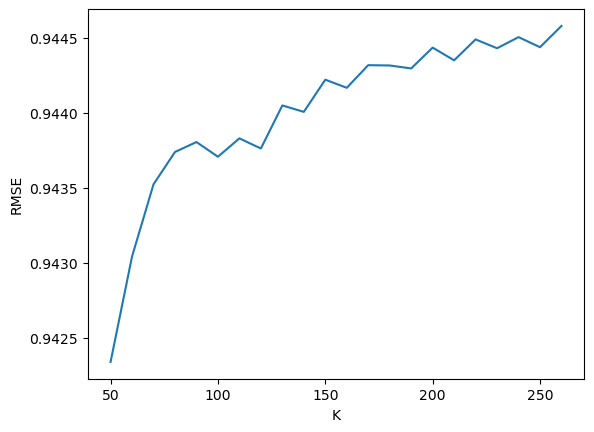

In [50]:
plt.plot(index, [x[2] for x in summary])
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()

<br>

## 04.06. SVD와의 구분
- **SVD는 데이터를 3개의 행렬로 분해하여 이를 학습시키고, 이 3개의 행렬로 원래의 행렬을 재현 (re-creation)하는 기법**
- **MF는 원래 데이터를 $P(M\times K)$, $Q(N\times K)$, 2개의 행렬로 분해**

<br>

<img src='https://velog.velcdn.com/images/sangyun/post/c04c962d-0953-45d2-aa81-637258a5bc61/image.png' width='800px'>

<br>

- **SVD는 원래 행렬을 분해해서 3개의 행렬로 만든 다음, 이를 사용하여 원래 행렬을 재현하는 데에는 좋은 성능이지만,**
    
    **원래 행렬에 없는 값을 예측하는 데는 문제**
    
    - **SVD는 행령를 3개로 분해하다 보니, 원래 행렬에는 결측값을 허용하지 않기 때문**
    
        $\rightarrow$ 영화 평점의 경우처럼, 사용자가 평가하지 않은 아이템에 대해서 결측값으로 표현할 수 없음
    
    <br>
    
    - **만약 결측값 대신 0으로 대체하는 경우, 0을 하나의 값으로 인식하여, 이 값을 재현할 수 있도록 행렬을 분해**
    
        $\rightarrow$ **을 재현한 결과에서 0이었던 원소는 모두 0에 가깝게 재현됨**
        
        $\rightarrow$ **즉, 평가하지 않은 항목을 0으로 표시하고, 평가한 값만 가지고 학습시킨 후 0의 값을 다시 예측값으로 계산할 수가 없는 구조**

    - SVD는 추천 시스템 분야에서는 거의 사용되지 않음

<br>

- **MF는 결측값을 0으로 표현했지만, SGD로 $P$, $Q$를 학습할 때에는 0인 값을 빼고 계산    $\rightarrow$ 사실상 결측값은 제외하고 계산을 하는 구조**

- **원래 $R$행렬에는 결측값이 있더라도, $P$, $Q$행렬은 결측값이 없이 학습되며,     학습이 끝나고 나면 $P$, $Q$를 사용해서 원래 행렬의 결측값도 정확히 예측**

<br>

- **MF와 SVD는 명백히 다른 분석기법이고, SVD는 추천 시스템분야에서는 거의 사용되지 않음**